## Environment
Using Kernel: `dan-dev-py312-r433`

-----

In [ ]:
from pathlib import Path

derived_data_path = Path("../derived_data/walker_lab")
input_data_path = derived_data_path / "low_sam_s009/all_detected"


In [8]:
import pandas as pd
sams_1_all_df = pd.read_csv(input_data_path/"sams-1_all.csv")
set_2_all_df = pd.read_csv(input_data_path/"set-2_all.csv")
set_16_all_df = pd.read_csv(input_data_path/"set-16_all.csv")

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def plot_venn3_diagram(set1, set2, set3, label1="Set 1", label2="Set 2", label3="Set 3", title="3-Set Venn Diagram"):
    """
    Plots a Venn diagram for three sets with formatted labels and summary counts.
    """
    # Create informative labels with total counts
    labels = (
        f"{label1}\n({len(set1):,})",
        f"{label2}\n({len(set2):,})",
        f"{label3}\n({len(set3):,})"
    )

    # Plot Venn diagram
    venn = venn3([set1, set2, set3], set_labels=labels,
                 set_colors=('skyblue', 'orange', 'lightgreen'), alpha=0.6)

    # Format subset labels with commas and adjust font sizes
    for subset_id in venn.id2idx:
        label = venn.get_label_by_id(subset_id)
        if label:
            try:
                value = int(label.get_text())
                label.set_text(f"{value:,}")
                label.set_fontsize(12)
            except (ValueError, TypeError):
                continue

    # Set font size for set labels
    for text in venn.set_labels:
        if text:
            text.set_fontsize(12)

    # Print summary counts (optional, could be logged instead)
    only_1 = len(set1 - set2 - set3)
    only_2 = len(set2 - set1 - set3)
    only_3 = len(set3 - set1 - set2)
    inter_12 = len(set1 & set2 - set3)
    inter_13 = len(set1 & set3 - set2)
    inter_23 = len(set2 & set3 - set1)
    inter_123 = len(set1 & set2 & set3)

    print(f"{label1} only: {only_1:,}")
    print(f"{label2} only: {only_2:,}")
    print(f"{label3} only: {only_3:,}")
    print(f"{label1} & {label2}: {inter_12:,}")
    print(f"{label1} & {label3}: {inter_13:,}")
    print(f"{label2} & {label3}: {inter_23:,}")
    print(f"All three: {inter_123:,}")

    # Finalize plot
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()
    

Sams-1 only: 1,125
Set-2 only: 60
Set-16 only: 122
Sams-1 & Set-2: 207
Sams-1 & Set-16: 211
Set-2 & Set-16: 85
All three: 15,750


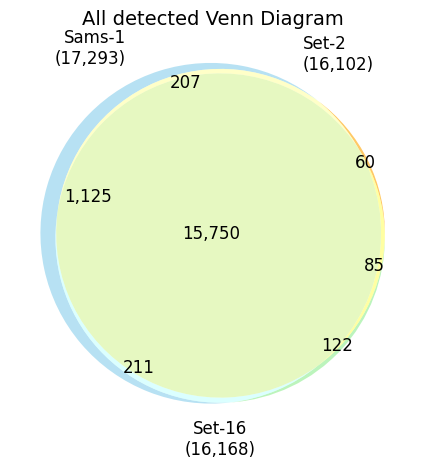

In [15]:
sams_1_all_set = set(sams_1_all_df['Wormbase_Id'].dropna().astype(str))
set_2_all_set = set(set_2_all_df['Wormbase_Id'].dropna().astype(str))
set_16_all_set = set(set_16_all_df['Wormbase_Id'].dropna().astype(str))

plot_venn3_diagram(sams_1_all_set, set_2_all_set, set_16_all_set, label1="Sams-1", label2="Set-2", label3="Set-16", title="All detected Venn Diagram")

In [16]:
derived_data_path = Path("../derived_data/walker_lab")
input_data_path = derived_data_path / "low_sam_s009/basal_conditions"
output_analysis_path = "../analysis/walker_lab/low_sam_s009"

In [21]:
import os
from wormcat3 import Wormcat, WormcatError, PAdjustMethod

sams_1_down_file_path = str(input_data_path / "sams-1_down.csv")
background = list(sams_1_all_df['Wormbase_Id'].dropna().astype(str))

wormcat = Wormcat(title = "sams-1_down w background", 
                  working_dir_path = output_analysis_path,
                  annotation_file_name = 'whole_genome_v2_nov-11-2021.csv')
wormcat.analyze_and_visualize_enrichment(sams_1_down_file_path, background)

wormcat = Wormcat(title="sams-1_down whole genome", 
                  working_dir_path = output_analysis_path,
                  annotation_file_name = 'whole_genome_v2_nov-11-2021.csv')
wormcat.analyze_and_visualize_enrichment(sams_1_down_file_path)


Analysis complete. Output can be found at ../analysis/walker_lab/low_sam_s009/sams-1_down_w_background_20265
Analysis complete. Output can be found at ../analysis/walker_lab/low_sam_s009/sams-1_down_whole_genome_62823


In [23]:
sams_1_all_file_path = str(derived_data_path / "low_sam_s009/all_detected/sams-1_all.csv")

wormcat = Wormcat(title = "sams-1 down GSEA", 
                  working_dir_path = output_analysis_path,
                  annotation_file_name = 'whole_genome_v2_nov-11-2021.csv')
wormcat.perform_gsea_analysis(sams_1_all_file_path)


Successfully made all Rank values unique while preserving order
Analysis complete. Output can be found at ../analysis/walker_lab/low_sam_s009/sams-1_down_GSEA_07131
